In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_regression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from matplotlib import pyplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick
import shap

# Model database

In [5]:
# Import final data base de inscritos presentes em todas as provas sem missing ~32 MM
df = pd.read_csv('df_basepronta2.csv', sep = ';')

print(df.shape)
#(1529177, 57)

(1529177, 85)


# Target Nota Geral

In [8]:
# target: variavel resposta dependente (desempenho em matematica) de acordo com um certo ponto de corte para cada ano (threshold):
threshold = .75

df_desemp = df.groupby('NU_ANO')['NU_MEDIA'].quantile(threshold).reset_index(name = 'desemp_geral')

df = df.merge(df_desemp, on = 'NU_ANO', how = 'left')

df['target_geral'] = np.where(df.NU_MEDIA < df.desemp_geral, 0, 1)

df['target_geral'].value_counts(normalize=True) * 100

target_geral
0   74.993608
1   25.006392
Name: proportion, dtype: float64

# Base e variáveis

In [11]:
df_models = df.copy()
print(df_models.shape)

(1529177, 87)


In [13]:
keep_y = ['target_geral']

keep_X_features = [
'FEMININO'
,'sóI'
,'sóC'
,'IeC'
,'Branca'
,'Parda'
,'Raca_outra'
,'CentroOeste'
,'Nordeste'
,'Norte'
,'Sudeste'
,'Sul'
,'escpartic_outra'
,'escpubl'
,'Mae_ESup_mais'
,'Mae_Ens_fundamental2'
,'Mae_Ens_medio3'
,'Mae_desc_nada0'
,'Mae_fund_incompl1'
,'Pai_ESup_mais'
,'Pai_Ens_fundamental2'
,'Pai_Ens_medio3'
,'Pai_desc_nada0'
,'Pai_fund_incompl1'
,'tamfam3peq'
,'tamfam5med'
,'tamfam6gde'
,'infra_basicacompleta'
,'infra_basicaincompleta'
,'renda_0e1'
,'renda_15'
]

# Um modelo por ano

#### Controlado por faixa de renda (classe = baixa renda) e ocupação da mãe (grupos 1, 2 e 3) e ocupação do pai (grupos 1, 2 e 3)

#### Verificar o feature importance de cada ano dos modelos XGBoost

## XGBoost Models

In [19]:
df_models_ano = {}
X =             {}
y =             {}
X_train =       {}
X_test =        {}
y_train =       {}
y_test =        {}


model_xg = {}
auc_xg_train = {}
fpr_xg_train = {}
tpr_xg_train = {}
thresholds_xg_train = {}

auc_xg_test = {}
fpr_xg_test = {}
tpr_xg_test = {}
thresholds_xg_test = {}

X_testGra = {}
X_testPeq = {}

columns = ['model','ano','feature','score']
rows_anos = []

Shape X[ 2015 ]..: (195417, 31)
Qtde treino......: (97708, 31)
Qtde teste.......: (97709, 31)
Ano 2015 :
    Fit...
    Apply...
    Compare...
    AUCs:
        Treino: 0.716892206478704
        Teste: 0.6707233313062281
    Feature importance...
    SHAP Values...


100%|===================| 97693/97708 [13:12<00:00]        

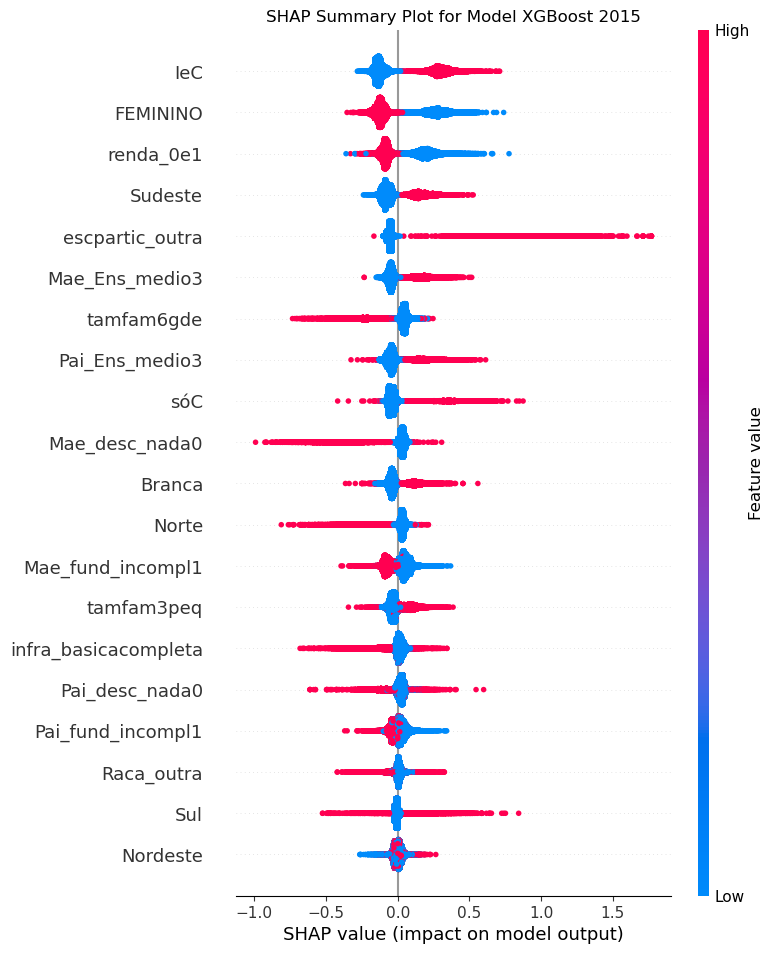

Shape X[ 2016 ]..: (219986, 31)
Qtde treino......: (109993, 31)
Qtde teste.......: (109993, 31)
Ano 2016 :
    Fit...
    Apply...
    Compare...
    AUCs:
        Treino: 0.7199461391888357
        Teste: 0.6739273166476366
    Feature importance...
    SHAP Values...


100%|===================| 109984/109993 [14:04<00:00]        

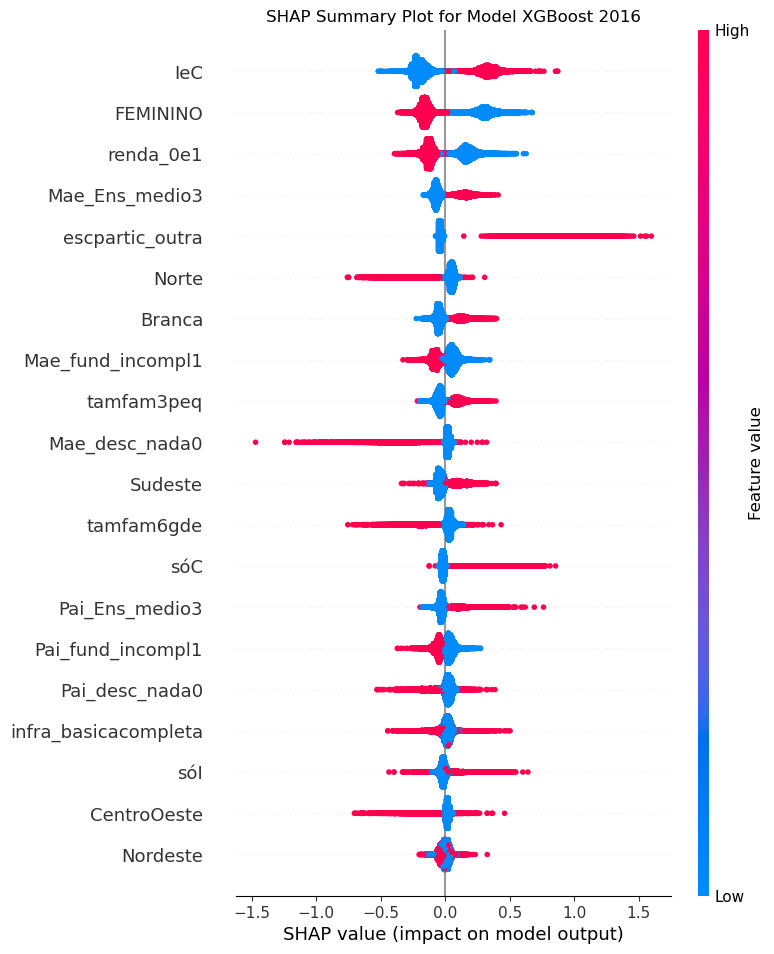

Shape X[ 2017 ]..: (209467, 31)
Qtde treino......: (104733, 31)
Qtde teste.......: (104734, 31)
Ano 2017 :
    Fit...
    Apply...
    Compare...
    AUCs:
        Treino: 0.7233959242624726
        Teste: 0.6765897025137848
    Feature importance...
    SHAP Values...


100%|===================| 104668/104733 [13:28<00:00]        

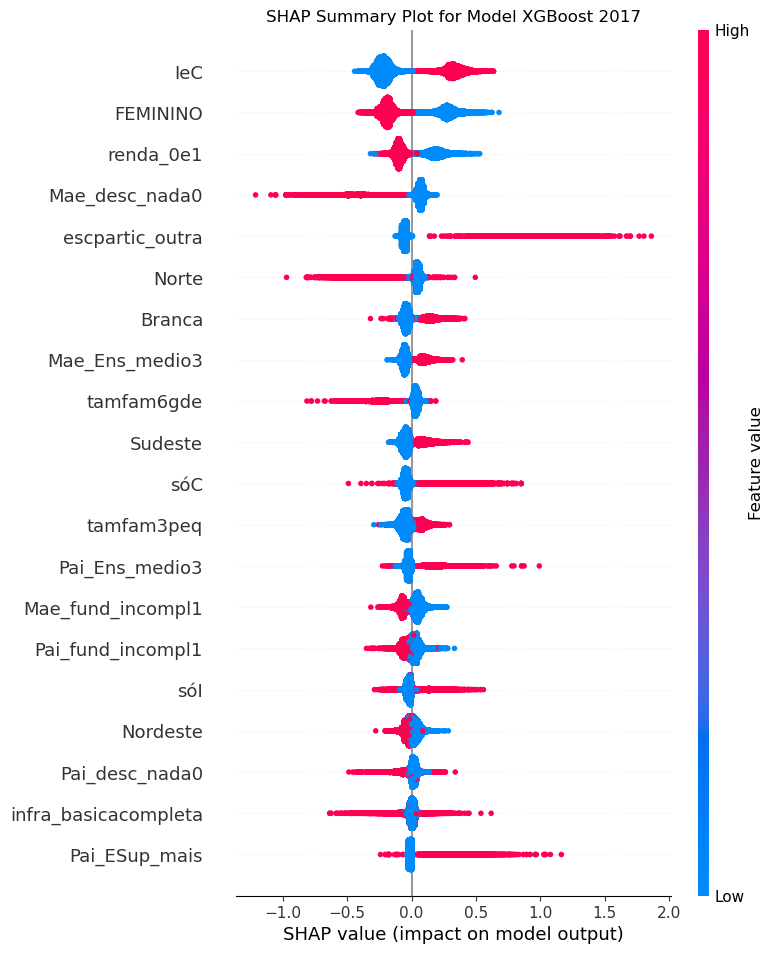

Shape X[ 2018 ]..: (196173, 31)
Qtde treino......: (98086, 31)
Qtde teste.......: (98087, 31)
Ano 2018 :
    Fit...
    Apply...
    Compare...
    AUCs:
        Treino: 0.7211122983144871
        Teste: 0.6674682765061899
    Feature importance...
    SHAP Values...


100%|===================| 98009/98086 [12:55<00:00]        

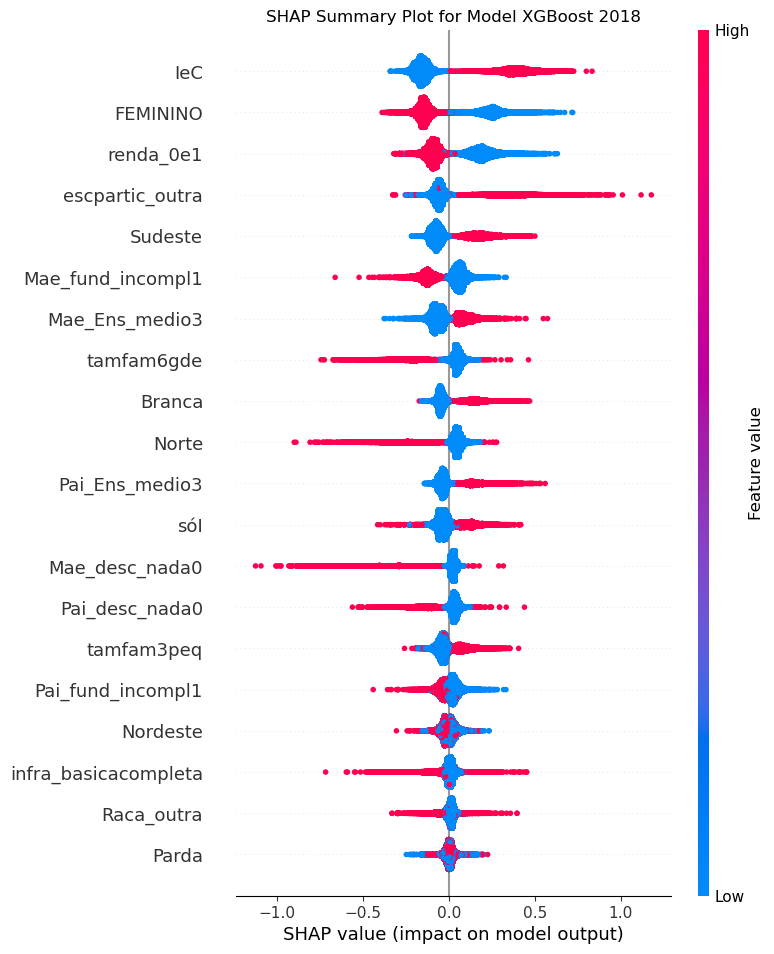

Shape X[ 2019 ]..: (189130, 31)
Qtde treino......: (94565, 31)
Qtde teste.......: (94565, 31)
Ano 2019 :
    Fit...
    Apply...
    Compare...
    AUCs:
        Treino: 0.7253130867170364
        Teste: 0.6771465655280291
    Feature importance...
    SHAP Values...


100%|===================| 94531/94565 [12:17<00:00]        

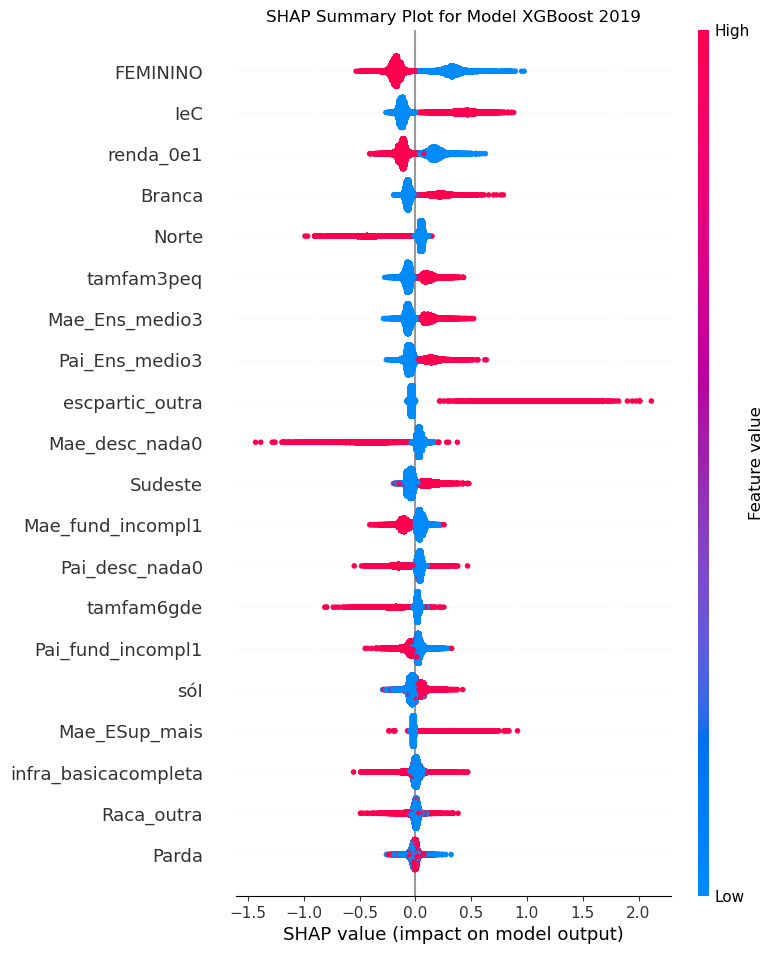

Shape X[ 2020 ]..: (115977, 31)
Qtde treino......: (57988, 31)
Qtde teste.......: (57989, 31)
Ano 2020 :
    Fit...
    Apply...
    Compare...
    AUCs:
        Treino: 0.7531425325975674
        Teste: 0.6877915523806093
    Feature importance...
    SHAP Values...


100%|===================| 57972/57988 [07:03<00:00]        

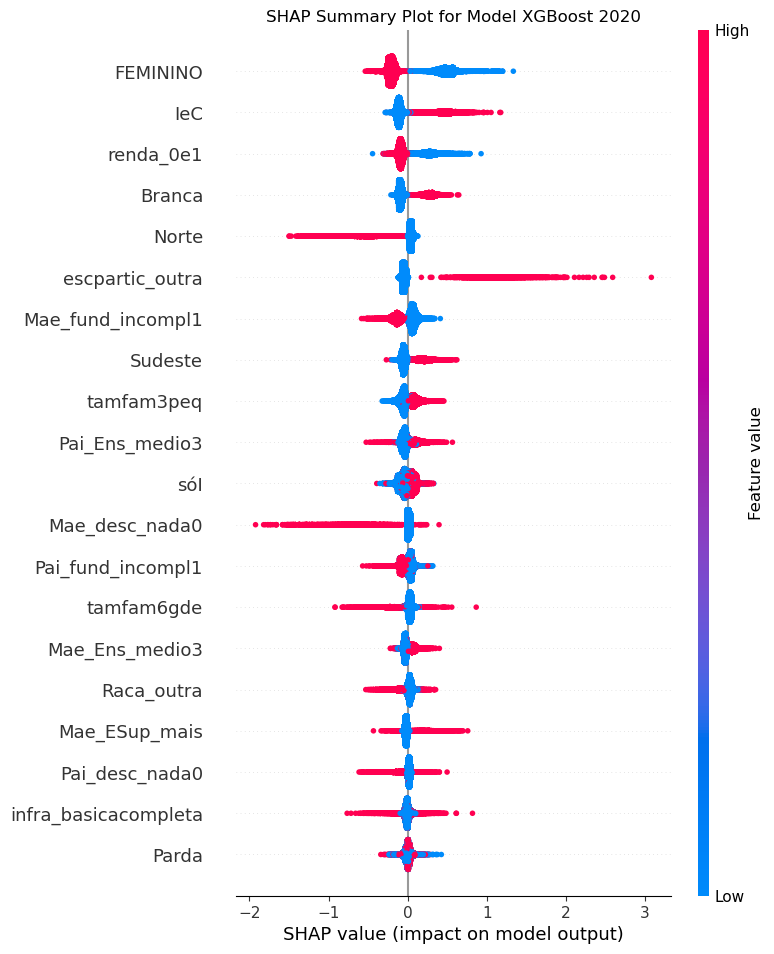

Shape X[ 2021 ]..: (112647, 31)
Qtde treino......: (56323, 31)
Qtde teste.......: (56324, 31)
Ano 2021 :
    Fit...
    Apply...
    Compare...
    AUCs:
        Treino: 0.7455095264335322
        Teste: 0.6804339386624574
    Feature importance...
    SHAP Values...


100%|===================| 56298/56323 [06:56<00:00]        

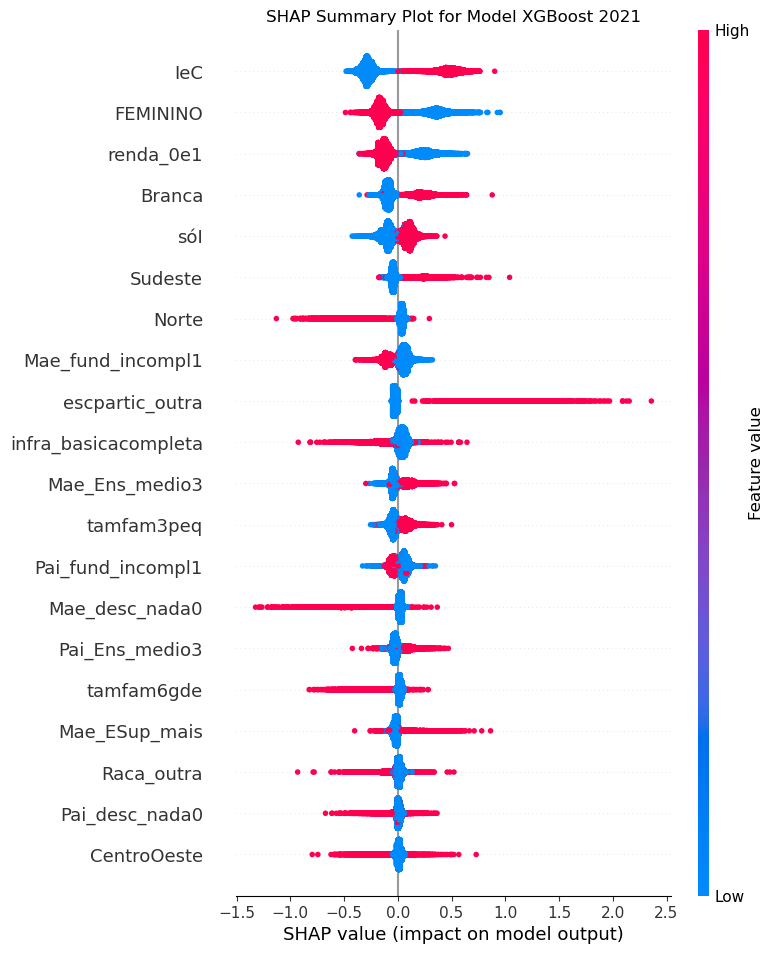

Shape X[ 2022 ]..: (135328, 31)
Qtde treino......: (67664, 31)
Qtde teste.......: (67664, 31)
Ano 2022 :
    Fit...
    Apply...
    Compare...
    AUCs:
        Treino: 0.7402933402179189
        Teste: 0.6767776701076464
    Feature importance...
    SHAP Values...


100%|===================| 67563/67664 [08:29<00:00]        

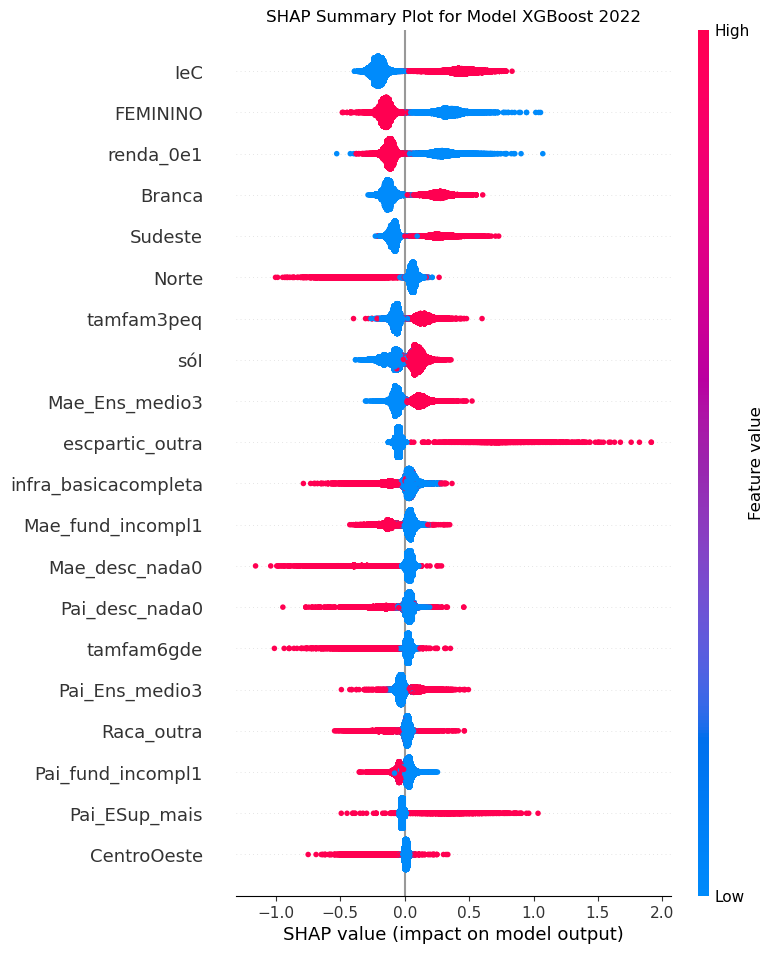

Shape X[ 2023 ]..: (155052, 31)
Qtde treino......: (77526, 31)
Qtde teste.......: (77526, 31)
Ano 2023 :
    Fit...
    Apply...
    Compare...
    AUCs:
        Treino: 0.7294695357591017
        Teste: 0.6800212516407911
    Feature importance...
    SHAP Values...


100%|===================| 77430/77526 [09:37<00:00]        

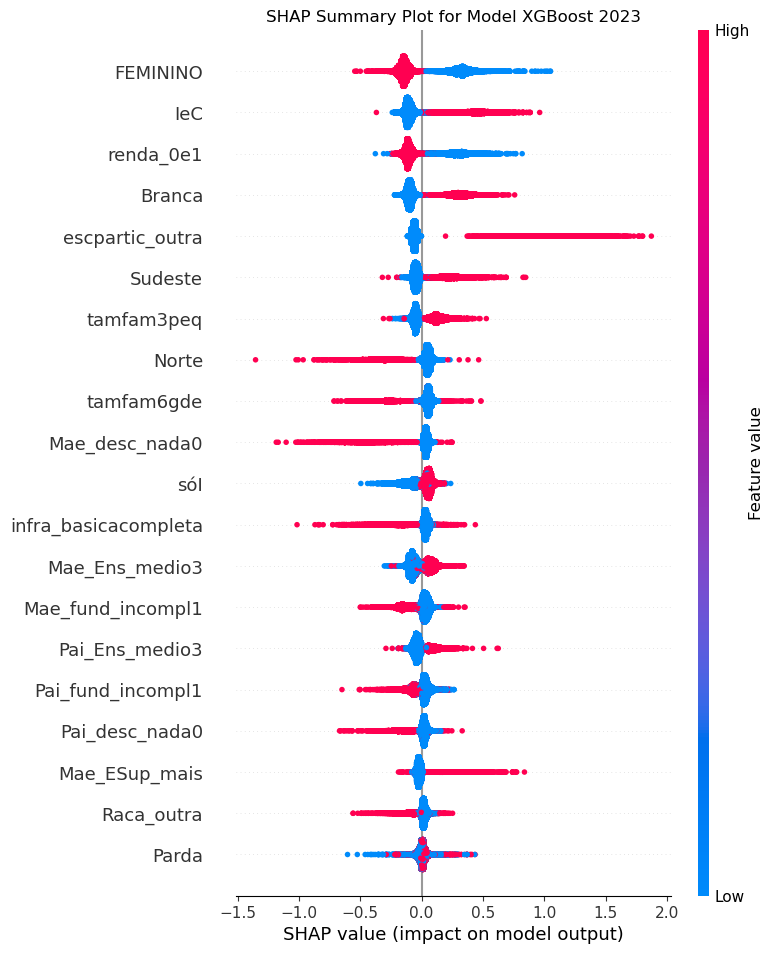

In [41]:
### Para cada ano, temos um conjunto de dados:
anos = df_models.NU_ANO.unique()

for i, ano in enumerate(anos):

    # df
    df_models_ano[i] = df_models[df_models['NU_ANO'] == ano]

    # Features
    X[i] = df_models[df_models['NU_ANO'] == ano][keep_X_features]
    print('Shape X[',ano,']..:', X[i].shape)

    # Target
    y[i] = df_models[df_models['NU_ANO'] == ano][keep_y]

    # Train Test Split
    X_train[i], X_test[i], y_train[i], y_test[i] = train_test_split(X[i], y[i], test_size = 0.5, random_state = 42)

    print('Qtde treino......:', X_train[i].shape)
    print('Qtde teste.......:', X_test[i].shape)
    
    print('Ano', ano, ':')
    # Fit model
    print('    Fit...')
    model_xg[i] = XGBClassifier().fit(X_train[i], y_train[i].target_geral)
    
    # Apply model
    print('    Apply...')
    df_models_ano[i]['xg_pred'] = model_xg[i].predict_proba(df_models_ano[i][keep_X_features])[:, 1]
    
    # Compare
    print('    Compare...')
    y_train[i]['xg_pred'] = model_xg[i].predict_proba(X_train[i])[:, 1]
    y_test[i]['xg_pred'] = model_xg[i].predict_proba(X_test[i])[:, 1]
        
    # AUC pro treino e teste
    print('    AUCs:')
    # treino
    auc_xg_train[i] = roc_auc_score(y_train[i].target_geral, y_train[i].xg_pred)
    fpr_xg_train[i], tpr_xg_train[i], thresholds_xg_train[i] = roc_curve(y_train[i].target_geral, y_train[i].xg_pred)
    print('        Treino:', auc_xg_train[i])
    
    # teste
    auc_xg_test[i] = roc_auc_score(y_test[i].target_geral, y_test[i].xg_pred)
    fpr_xg_test[i], tpr_xg_test[i], thresholds_xg_test[i] = roc_curve(y_test[i].target_geral, y_test[i].xg_pred)
    print('        Teste:', auc_xg_test[i])
    
    # Feature importance
    print('    Feature importance...')
    importance = model_xg[i].feature_importances_
    for j, v in enumerate(importance):
        row = ['xg', ano, keep_X_features[j], v]
        rows_anos.append(row)

    # SHAP Values
    print('    SHAP Values...')
    explainer = shap.Explainer(model_xg[i], X_train[i])
    shap_values = explainer(X_train[i])
    shap.summary_plot(shap_values, X_train[i], show = False)
    plt.title(f'SHAP Summary Plot for Model XGBoost {ano}')
    plt.show()

# SHAP com uma amostra pequena de dados para rodar mais rápido

In [3]:
for i, ano in enumerate(anos):
    
    print('Ano', ano, ':')
    # Fit model
    print('    Fit...')
    model_xg[i] = XGBClassifier().fit(X_train[i], y_train[i].target_geral)
    
    # Apply model
    print('    Apply...')
    df_models_ano[i]['xg_pred'] = model_xg[i].predict_proba(df_models_ano[i][keep_X_features])[:, 1]
    
    # Compare
    print('    Compare...')
    y_train[i]['xg_pred'] = model_xg[i].predict_proba(X_train[i])[:, 1]
    y_test[i]['xg_pred'] = model_xg[i].predict_proba(X_test[i])[:, 1]
        
    # AUC pro treino e teste
    print('    AUCs:')
    # treino
    auc_xg_train[i] = roc_auc_score(y_train[i].target_geral, y_train[i].xg_pred)
    fpr_xg_train[i], tpr_xg_train[i], thresholds_xg_train[i] = roc_curve(y_train[i].target_geral, y_train[i].xg_pred)
    print('        Treino:', auc_xg_train[i])
    
    # teste
    auc_xg_test[i] = roc_auc_score(y_test[i].target_geral, y_test[i].xg_pred)
    fpr_xg_test[i], tpr_xg_test[i], thresholds_xg_test[i] = roc_curve(y_test[i].target_geral, y_test[i].xg_pred)
    print('        Teste:', auc_xg_test[i])
    
    # Feature importance
    print('    Feature importance...')
    importance = model_xg[i].feature_importances_
    for j, v in enumerate(importance):
        row = ['xg', ano, keep_X_features[j], v]
        rows_anos.append(row)

    # SHAP Values
    print('    SHAP Values...')

    X_testGra[i], X_testPeq[i] = train_test_split(X_test[i], test_size = 0.1, random_state = 42)
    
    explainer = shap.Explainer(model_xg[i], X_testPeq[i])
    shap_values = explainer(X_testPeq[i])
    shap.summary_plot(shap_values, X_testPeq[i], show = False)
    plt.title(f'SHAP Summary Plot for Model XGBoost {ano}')
    plt.show()

NameError: name 'anos' is not defined

# Feature Importance

In [22]:
### Para cada ano, temos um conjunto de dados:
anos = df_models.NU_ANO.unique()

for i, ano in enumerate(anos):

    # df
    df_models_ano[i] = df_models[df_models['NU_ANO'] == ano]

    # Features
    X[i] = df_models[df_models['NU_ANO'] == ano][keep_X_features]
    print('Shape X[',ano,']..:', X[i].shape)

    # Target
    y[i] = df_models[df_models['NU_ANO'] == ano][keep_y]

    # Train Test Split
    X_train[i], X_test[i], y_train[i], y_test[i] = train_test_split(X[i], y[i], test_size = 0.5, random_state = 42)

    print('Qtde treino......:', X_train[i].shape)
    print('Qtde teste.......:', X_test[i].shape)
    
    print('Ano', ano, ':')
    # Fit model
    print('    Fit...')
    model_xg[i] = XGBClassifier().fit(X_train[i], y_train[i].target_geral)
    
    # Apply model
    print('    Apply...')
    df_models_ano[i]['xg_pred'] = model_xg[i].predict_proba(df_models_ano[i][keep_X_features])[:, 1]
    
    # Compare
    print('    Compare...')
    y_train[i]['xg_pred'] = model_xg[i].predict_proba(X_train[i])[:, 1]
    y_test[i]['xg_pred'] = model_xg[i].predict_proba(X_test[i])[:, 1]
        
    # AUC pro treino e teste
    print('    AUCs:')
    # treino
    auc_xg_train[i] = roc_auc_score(y_train[i].target_geral, y_train[i].xg_pred)
    fpr_xg_train[i], tpr_xg_train[i], thresholds_xg_train[i] = roc_curve(y_train[i].target_geral, y_train[i].xg_pred)
    print('        Treino:', auc_xg_train[i])
    
    # teste
    auc_xg_test[i] = roc_auc_score(y_test[i].target_geral, y_test[i].xg_pred)
    fpr_xg_test[i], tpr_xg_test[i], thresholds_xg_test[i] = roc_curve(y_test[i].target_geral, y_test[i].xg_pred)
    print('        Teste:', auc_xg_test[i])
    
    # Feature importance
    print('    Feature importance...')
    importance = model_xg[i].feature_importances_
    for j, v in enumerate(importance):
        row = ['xg', ano, keep_X_features[j], v]
        rows_anos.append(row)

    # # SHAP Values
    # print('    SHAP Values...')
    # explainer = shap.Explainer(model_xg[i], X_train[i])
    # shap_values = explainer(X_train[i])
    # shap.summary_plot(shap_values, X_train[i], show = False)
    # plt.title(f'SHAP Summary Plot for Model XGBoost {ano}')
    # plt.show()

Shape X[ 2015 ]..: (195417, 31)
Qtde treino......: (97708, 31)
Qtde teste.......: (97709, 31)
Ano 2015 :
    Fit...
    Apply...
    Compare...
    AUCs:
        Treino: 0.716892206478704
        Teste: 0.6707233313062281
    Feature importance...
Shape X[ 2016 ]..: (219986, 31)
Qtde treino......: (109993, 31)
Qtde teste.......: (109993, 31)
Ano 2016 :
    Fit...
    Apply...
    Compare...
    AUCs:
        Treino: 0.7199461391888357
        Teste: 0.6739273166476366
    Feature importance...
Shape X[ 2017 ]..: (209467, 31)
Qtde treino......: (104733, 31)
Qtde teste.......: (104734, 31)
Ano 2017 :
    Fit...
    Apply...
    Compare...
    AUCs:
        Treino: 0.7233959242624726
        Teste: 0.6765897025137848
    Feature importance...
Shape X[ 2018 ]..: (196173, 31)
Qtde treino......: (98086, 31)
Qtde teste.......: (98087, 31)
Ano 2018 :
    Fit...
    Apply...
    Compare...
    AUCs:
        Treino: 0.7211122983144871
        Teste: 0.6674682765061899
    Feature importance...
S

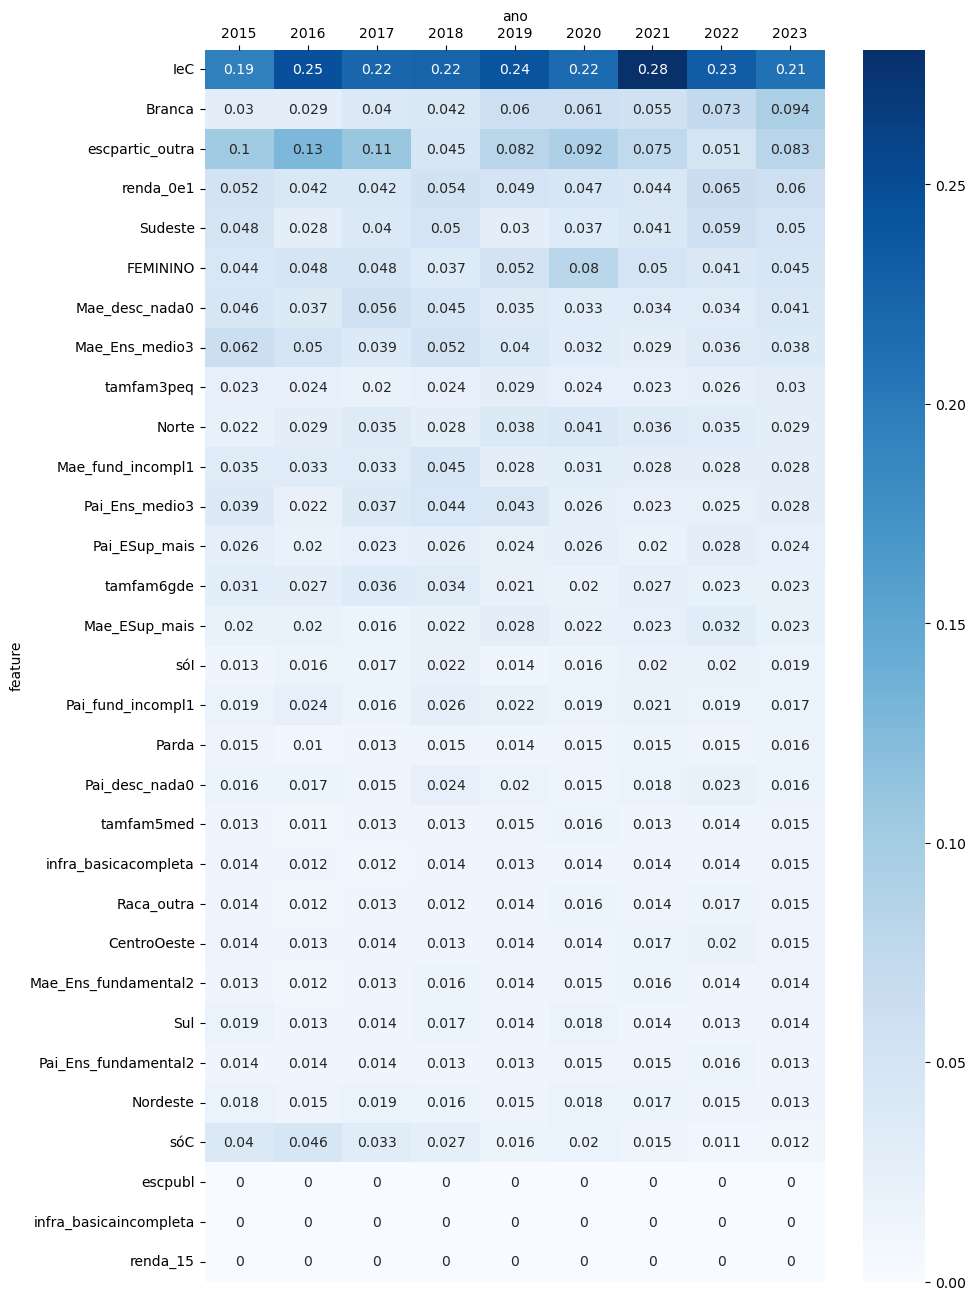

In [26]:
df_feat_impor_anos = pd.DataFrame(rows_anos, columns=columns)

# importância ordenada pelo melhor modelo na validação (xg)
imp_anos = df_feat_impor_anos.pivot(index = 'feature', columns = 'ano', values = 'score').sort_values(by=[2023], ascending = False)

fig, ax = plt.subplots(figsize=(10,16))
sns.heatmap(imp_anos, cmap = 'Blues', annot=True, ax = ax)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
plt.show()